# Residual model generation pipeline

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Preparing the data
First define where the data is stored, then it can be loaded, the `prepare_data` function calculates the labels (residuals).

In [2]:
from LMCE.data_prep import prepare_data, create_dataloader

data_path = "./crazyflie-data-collection"

# Get train data paths
indices = [f"{i:02}" for i in range(0, 37)]
del indices[23]
training_data_paths = [f"./crazyflie-data-collection/brushless_flights/data/eckart{i}" for i in indices]
testing_data_paths = ["./crazyflie-data-collection/brushless_flights/data/eckart23"]

# Prepare data
X_train, y_train = prepare_data(training_data_paths, save_as="train_data")
X_test, y_test = prepare_data(testing_data_paths, save_as="test_data", shuffle_data=False)
train_dataloader = create_dataloader(X_train, y_train)
test_dataloader = create_dataloader(X_test, y_test)

TypeError: prepare_data() missing 1 required positional argument: 'residual_func'

## Training the model

Epoch 1
-------------------------------
avg. train loss:  0.004068
Avg. test loss: 0.000095 


-------------------------------
Epoch 2
-------------------------------
avg. train loss:  0.000527
Avg. test loss: 0.000082 


-------------------------------
Epoch 3
-------------------------------
avg. train loss:  0.000079
Avg. test loss: 0.000048 


-------------------------------
Epoch 4
-------------------------------
avg. train loss:  0.000029
Avg. test loss: 0.000028 


-------------------------------
Epoch 5
-------------------------------
avg. train loss:  0.000024
Avg. test loss: 0.000038 


-------------------------------
Epoch 6
-------------------------------
avg. train loss:  0.000015
Avg. test loss: 0.000079 


-------------------------------
Epoch 7
-------------------------------
avg. train loss:  0.000013
Avg. test loss: 0.000021 


-------------------------------
Epoch 8
-------------------------------
avg. train loss:  0.000007
Avg. test loss: 0.000010 


----------------

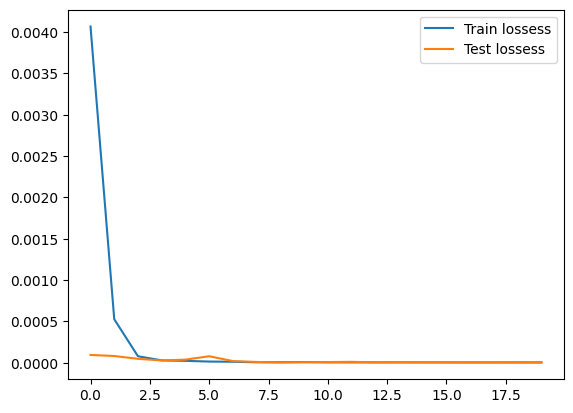

In [ ]:
from LMCE.model import MLP

# Create and train neural network
model = MLP()
model.train_model(train_dataloader, test_dataloader, epochs=20)
model.show_progress()
model.save("model.pth")

## Testing the model

Average error: (x) -> 0.0018757393585299923 (y) -> 0.00219954322949351


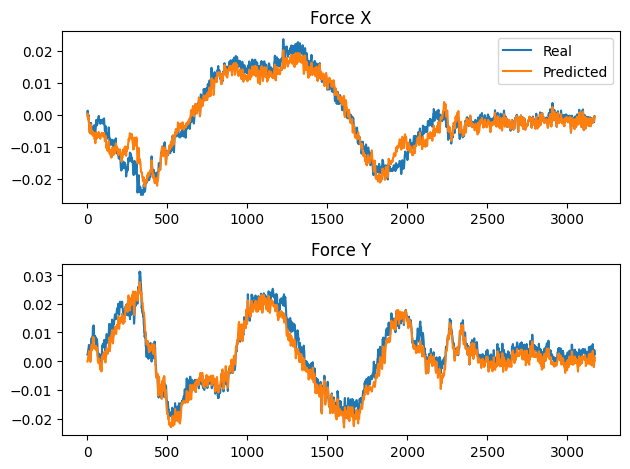

In [ ]:
weights = torch.load('./models/model.pth')
model.load_state_dict(weights)

tensor_input = torch.from_numpy(X_test)
pred = model.forward(tensor_input).detach().numpy()
error = np.abs(y_test-pred)
print(f"Average error: (x) -> {np.mean(error[:, 0])} (y) -> {np.mean(error[:, 1])}")

fig, ax = plt.subplots(2)
ax[0].plot(y_test[:, 0], label="Real")
ax[0].plot(pred[:, 0], label="Predicted")
ax[0].set_title('Force X')

ax[1].plot(y_test[:, 1], label="Real")
ax[1].plot(pred[:, 1], label="Predicted")
ax[1].set_title('Force Y')

ax[0].legend()
plt.tight_layout()
plt.show()

## Translating the model to c code

In [ ]:
from LMCE.model_to_c_conversion import exportNet, c_model_test

# Generate the model c code
model_path = "./models/model.pth"
exportNet(model_path)

# Test if the generated model gives the same outputs as the original
c_model_test(model, "./data/test_data.npz")

Comparing with original...
Models give the same outputs!


## Adding the model to the cf-firmware